In [33]:
from pylab import rcParams
rcParams['figure.figsize'] = 28,12 # Задать размер графиков

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
players = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/python/nhl-game-data/player_info.csv')
teams = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/python/nhl-game-data/team_info.csv')
game = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/python/nhl-game-data/game.csv')
player_stats = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/python/nhl-game-data/game_skater_stats.csv')

'\nДанный график показывает количество игроков НХЛ по нациолальности.\nНаибольшее количество игроков с паспортом Канады. С гражданством Финляндии, России, Чехии преблизительно одинаковое \n(примерно по 100).\n\n'

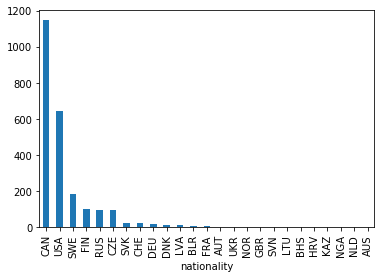

In [3]:
player_nationality = players.groupby(['nationality']).count()
player_visualisation = player_nationality.player_id.sort_values(ascending = False)
player_visualisation.plot(kind = 'bar')

'''
Данный график показывает количество игроков НХЛ по нациолальности.
Наибольшее количество игроков с паспортом Канады. С гражданством Финляндии, России, Чехии преблизительно одинаковое 
(примерно по 100).

'''

'\nДанный график показывает очередность создания команд в НХЛ.\n\n'

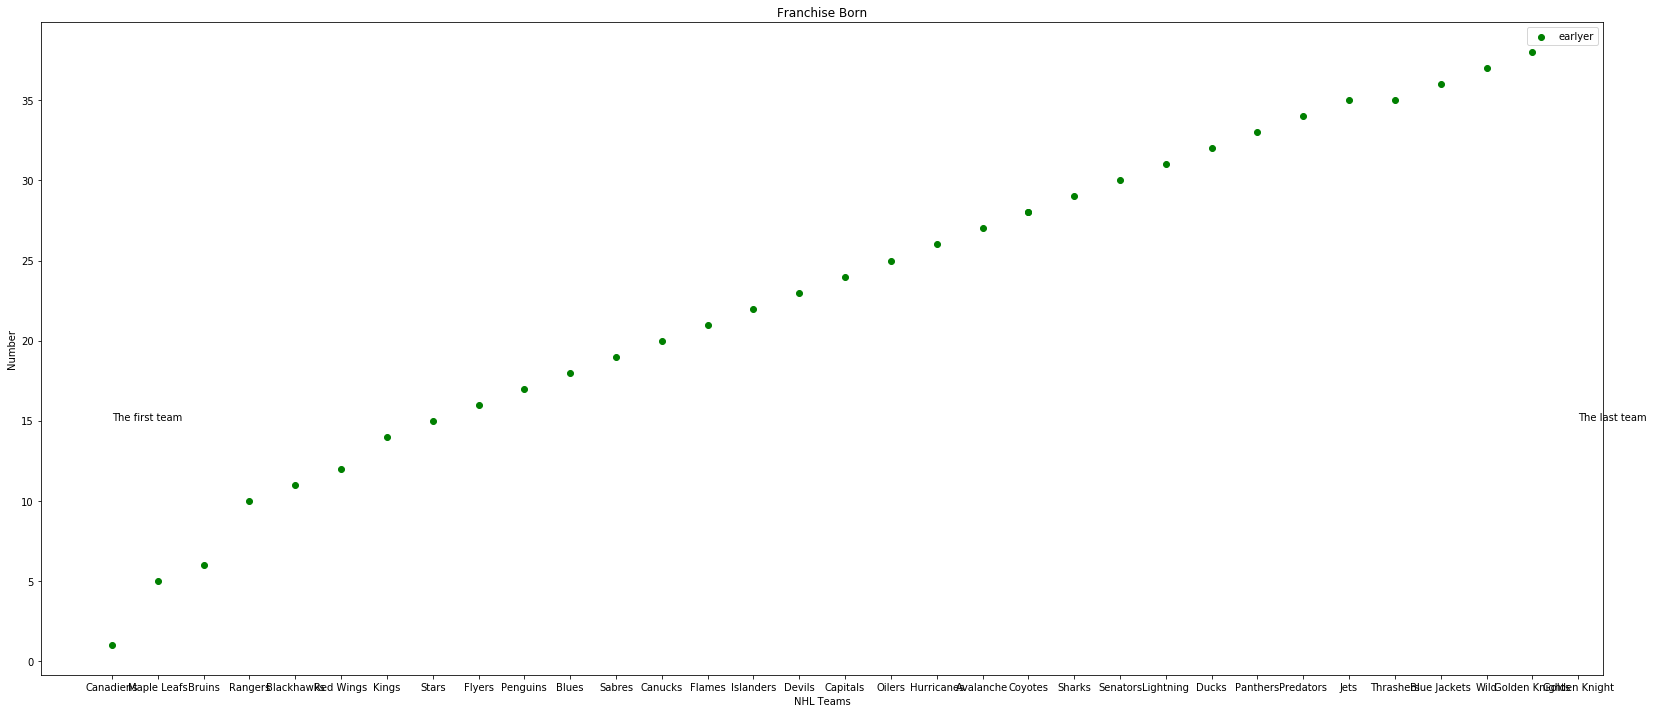

In [54]:
team_born = teams.sort_values(['franchiseId'])
id_ = team_born['franchiseId']
plt.scatter(team_born['teamName'], team_born['franchiseId'], color = 'g', label = 'earlyer') 
# color = g - задать цвет, + параметр linestyle, label создает пояснительную надпись
plt.ylabel('Number') # Задать название оси у
plt.title('Franchise Born') # Задать название графика
plt.xlabel('NHL Teams') # Задать название оси х
plt.legend(loc = 'best') # Вывести поянительную запись в "лучшем месте"

# plt.yticks('one','two', 'three') # Изменить метки по оси у (вместо 0-5-10-15-20-25-30-35 будет one, two, three и т.д)

annotance = [('Canadiens', 'The first team'),
            ('Golden Knight', 'The last team')]

for team, label in annotance:
    plt.annotate (label, xy = (team, 15))  # Добавить свой текст в график

'''
Данный график показывает очередность создания команд в НХЛ.

'''

'\nНа данном графике показано каличтво играков НХЛ в каждом амплуа.\n'

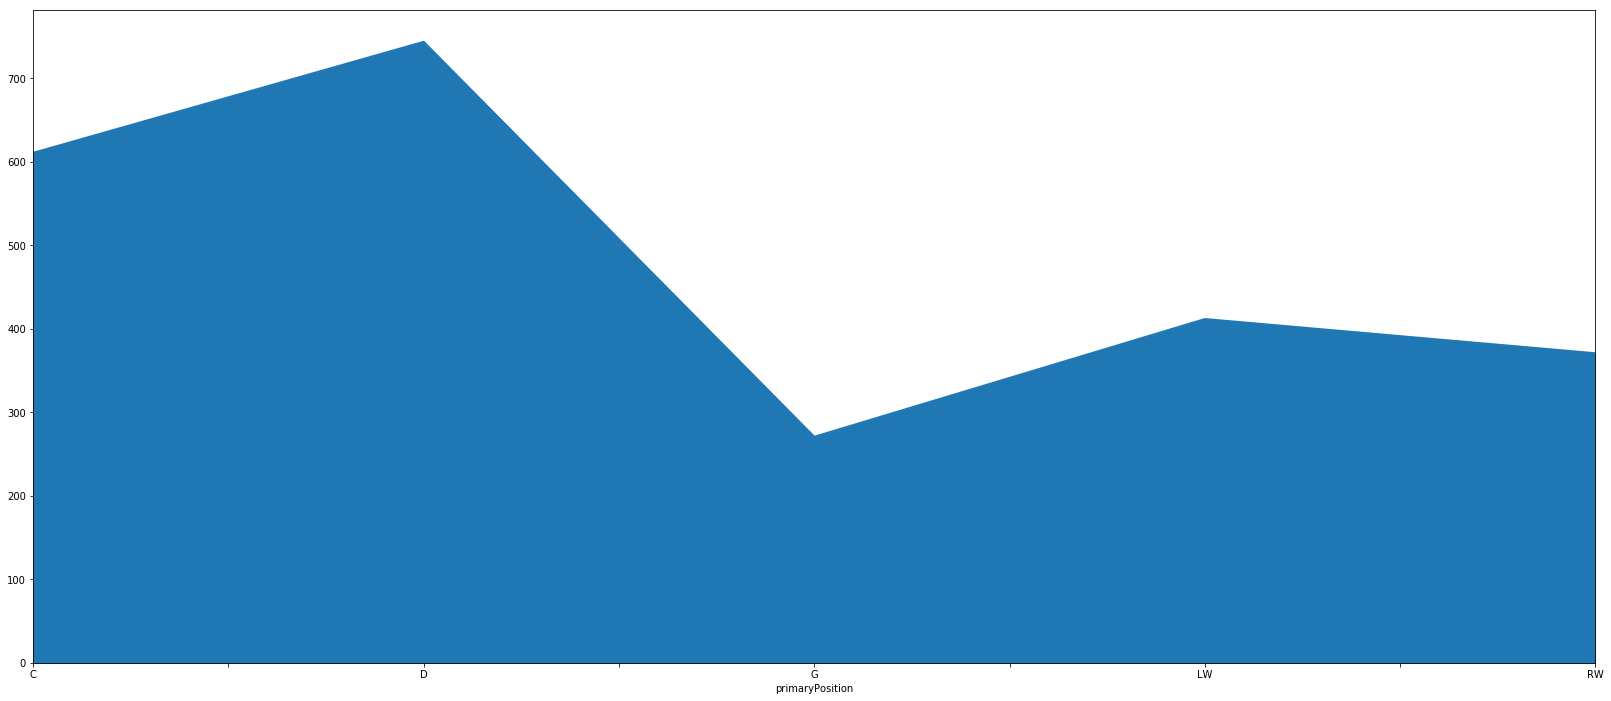

In [55]:
players_position = players.groupby('primaryPosition').count()
players_position['player_id'].plot(kind = 'area')

plt.savefig('players.png', bbox_inches = 'tight') # Сохранить график формат .png, bbox_inches - какую часть рисунка
                                                  # tight - только график без лишних областей

'''
На данном графике показано каличтво играков НХЛ в каждом амплуа.
'''

'\nГрафик отображает количество забитых голов игроками НХЛ входящих в ТОП 10 по количеству нанесенных бросков.\n'

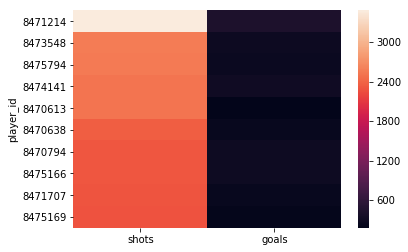

In [22]:
player_stats_groupby = player_stats.groupby('player_id').sum()
player_filter = player_stats_groupby.filter(items = ['shots', 'goals']).sort_values('shots', ascending = False).head(10)

sns.heatmap(player_filter)

'''
График отображает количество забитых голов игроками НХЛ входящих в ТОП 10 по количеству нанесенных бросков.
'''

In [23]:
stats_season = game.groupby('season').sum()
stats_season_goals = stats_season.filter(items = ['season','home_goals','away_goals'])
stats_season_goals

,home_goals,away_goals
season,,
20102011,3813,3556
20112012,3759,3383
20122013,2309,2042
20132014,3816,3455
20142015,3743,3424
20152016,3706,3444
20162017,3840,3412
20172018,4228,3820
20182019,4280,3869


'\nДанный график показывает распределение каличества шайб, забитых в каждом сезоне командами дома/в гостях.\nНа графике четко видны сезоны с аномальной статистикой по забитым шайбам.\nПоказания с самой низкой результативностью можно объяснить сокращенным сезоном.\nТакже мы видим, что все сезоны, кроме трех, находятся очень близко по результативности.\nЗаметное увеличение результативности произошло в последние два сезона\n'

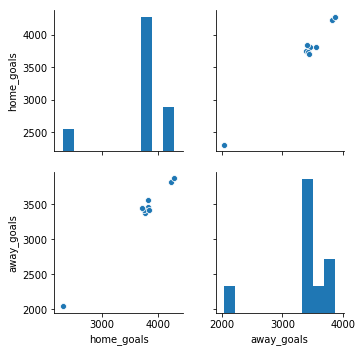

In [24]:
stats_goals_plot = sns.pairplot(stats_season_goals)

'''
Данный график показывает распределение каличества шайб, забитых в каждом сезоне командами дома/в гостях.
На графике четко видны сезоны с аномальной статистикой по забитым шайбам.
Показания с самой низкой результативностью можно объяснить сокращенным сезоном.
Также мы видим, что все сезоны, кроме трех, находятся очень близко по результативности.
Заметное увеличение результативности произошло в последние два сезона
'''